In [1]:
from torch import optim
import numpy as np
from matplotlib import pyplot as plt
import torch
import torchvision
from torch import nn
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F

In [2]:
torch.__version__

'2.0.0'

### 数据准备

In [3]:
# 对数据做归一化 (-1, 1)
transform = transforms.Compose([
    transforms.ToTensor(),  # (0, 1); channel, heigh, width
    transforms.Normalize(0.5, 0.5)  # (x-均值)/方差: (0, 1)->(-1, 1)
])

In [4]:
train_ds = torchvision.datasets.MNIST('data', train=True, transform=transform, download=True)

In [5]:
dataloader = DataLoader(train_ds, batch_size=64, shuffle=True)

In [6]:
imgs, targets = next(iter(dataloader))

In [7]:
imgs.shape

torch.Size([64, 1, 28, 28])

### 定义生成器

In [8]:
# 输入是长度为100的噪声（正太分布随机数）
# 输出为(1, 28, 28)的图片
# linear 1:    100->256
# linear 2:    256->512
# linear 3:    512->28*28
# reshape:     28*28->(1,28,,28)

In [9]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.main = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 28 * 28),
            nn.Tanh()  # (-1, 1)之间
        )

    def forward(self, x):
        # x 表示长度为100的noise输入
        img = self.main(x)
        img = img.view(-1, 28, 28)
        return img

### 定义判别器

In [10]:
# 输入为(1, 28, 28)的图片 输出为二分类的概率值，输出使用sigmoid激活 0-1
# BCEloss计算交叉熵损失

# nn.LeakyReLU    f(x): x>0 输出 0;  x<0 输出 a*x  a表示一个很小的斜率，比如0.1
# 判别器中一般推荐使用 LeakyReLU

In [11]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.main = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.LeakyReLU(),
            nn.Linear(512, 256),
            nn.LeakyReLU(),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.main(x)
        return x

### 初始化模型、优化器及损失计算函数

In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [13]:
gen = Generator().to(device)
dis = Discriminator().to(device)

In [14]:
g_optim = optim.Adam(gen.parameters(), lr=0.0001)
d_optim = optim.Adam(dis.parameters(), lr=0.0001)

In [15]:
loss_fn = nn.BCELoss()

### 绘图函数

In [16]:
def gen_img_plot(model, test_input):
    prediction = np.squeeze(model(test_input).detach().cpu().numpy())
    fig = plt.figure(figsize=(4, 4))
    for i in range(len(prediction)):  # range(16)
        plt.subplot(4, 4, i + 1)
        plt.imshow((prediction[i] + 1) / 2)  # 恢复到(0,1)
        plt.axis('off')
    plt.show()

In [17]:
test_input = torch.randn(16, 100, device=device)

### GAN的训练

In [18]:
D_loss = []
G_loss = []

epoch: 0 	 D_epoch_loss: 0.4150971472263336 	 G_epoch_loss: 2.528740406036377


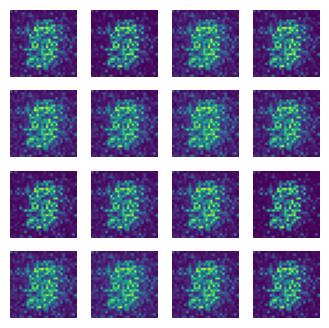

epoch: 1 	 D_epoch_loss: 0.36207109689712524 	 G_epoch_loss: 2.8173294067382812


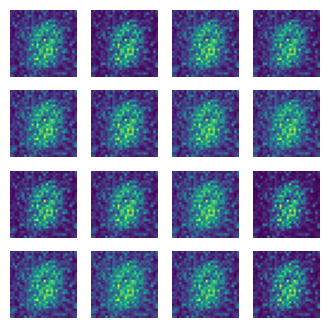

epoch: 2 	 D_epoch_loss: 0.1433423012495041 	 G_epoch_loss: 3.6660549640655518


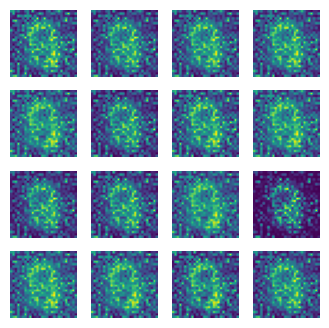

epoch: 3 	 D_epoch_loss: 0.12687788903713226 	 G_epoch_loss: 4.062778472900391


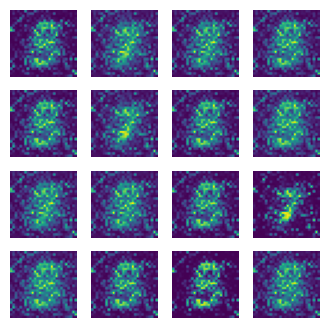

epoch: 4 	 D_epoch_loss: 0.10130586475133896 	 G_epoch_loss: 4.657414436340332


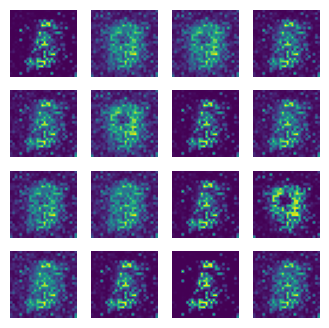

epoch: 5 	 D_epoch_loss: 0.0842178612947464 	 G_epoch_loss: 4.911074638366699


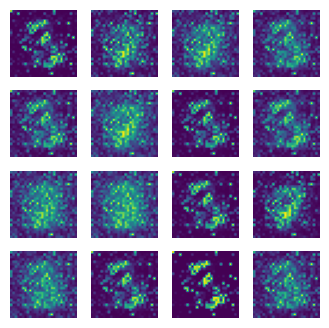

epoch: 6 	 D_epoch_loss: 0.09892616420984268 	 G_epoch_loss: 5.233940124511719


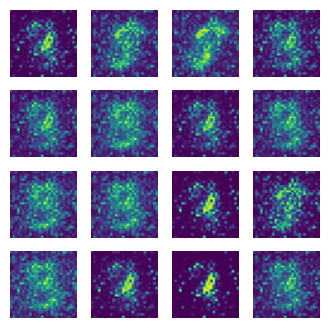

epoch: 7 	 D_epoch_loss: 0.13224776089191437 	 G_epoch_loss: 5.125797748565674


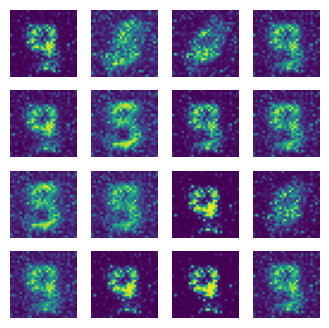

epoch: 8 	 D_epoch_loss: 0.13962073624134064 	 G_epoch_loss: 5.108743667602539


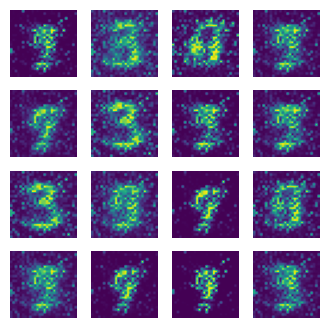

epoch: 9 	 D_epoch_loss: 0.11895755678415298 	 G_epoch_loss: 5.742019176483154


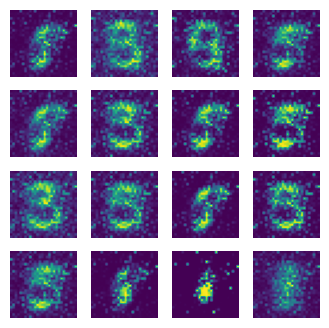

epoch: 10 	 D_epoch_loss: 0.13704706728458405 	 G_epoch_loss: 5.535414695739746


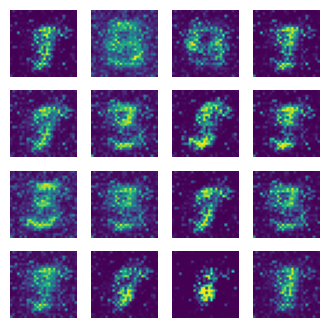

epoch: 11 	 D_epoch_loss: 0.1486349254846573 	 G_epoch_loss: 5.344541549682617


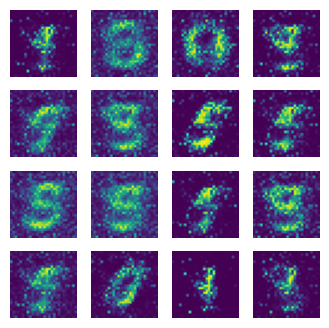

epoch: 12 	 D_epoch_loss: 0.18005870282649994 	 G_epoch_loss: 4.9895453453063965


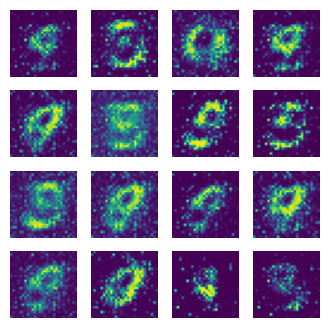

epoch: 13 	 D_epoch_loss: 0.16706733405590057 	 G_epoch_loss: 5.531577110290527


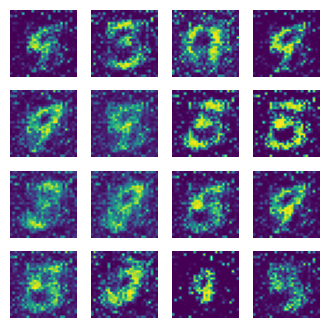

epoch: 14 	 D_epoch_loss: 0.17666299641132355 	 G_epoch_loss: 5.704925060272217


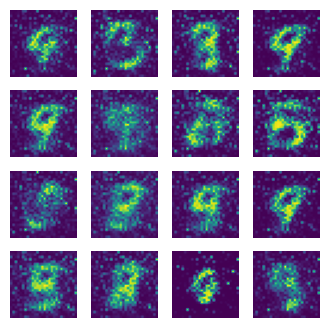

epoch: 15 	 D_epoch_loss: 0.1586710810661316 	 G_epoch_loss: 5.4060282707214355


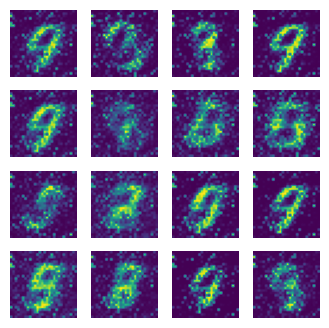

epoch: 16 	 D_epoch_loss: 0.16891758143901825 	 G_epoch_loss: 5.448831558227539


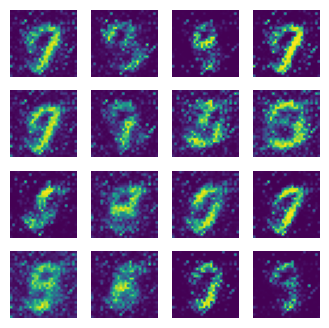

epoch: 17 	 D_epoch_loss: 0.1614643782377243 	 G_epoch_loss: 5.065021991729736


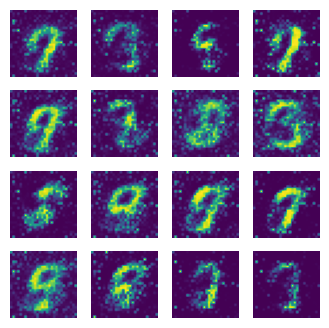

epoch: 18 	 D_epoch_loss: 0.18229016661643982 	 G_epoch_loss: 5.160483360290527


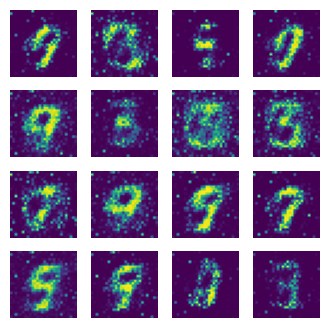

epoch: 19 	 D_epoch_loss: 0.1832437664270401 	 G_epoch_loss: 5.1813530921936035


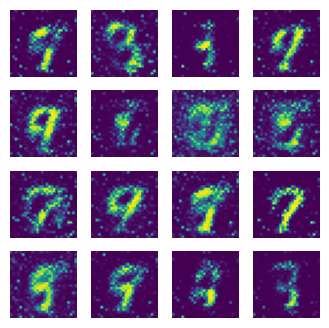

epoch: 20 	 D_epoch_loss: 0.20155200362205505 	 G_epoch_loss: 5.005971431732178


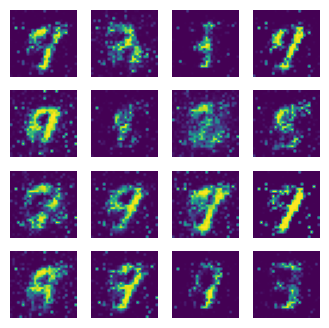

epoch: 21 	 D_epoch_loss: 0.170193612575531 	 G_epoch_loss: 5.553624629974365


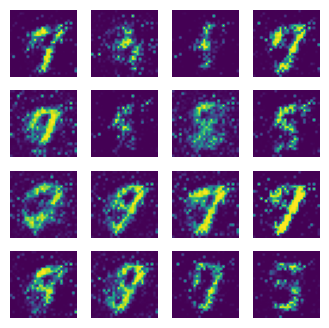

epoch: 22 	 D_epoch_loss: 0.1962604820728302 	 G_epoch_loss: 5.056092739105225


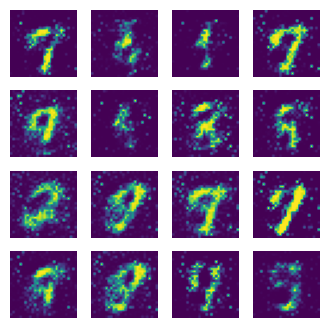

epoch: 23 	 D_epoch_loss: 0.23528867959976196 	 G_epoch_loss: 4.629488945007324


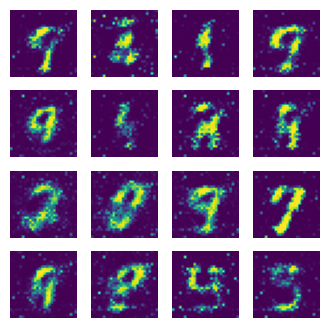

epoch: 24 	 D_epoch_loss: 0.2749304175376892 	 G_epoch_loss: 4.205485820770264


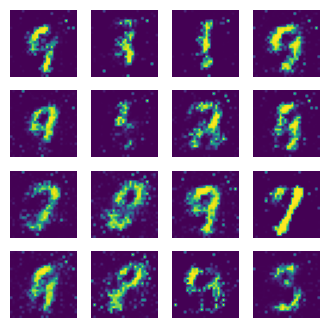

epoch: 25 	 D_epoch_loss: 0.30913761258125305 	 G_epoch_loss: 4.012989044189453


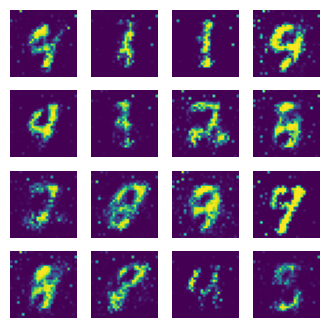

epoch: 26 	 D_epoch_loss: 0.28995954990386963 	 G_epoch_loss: 4.09816312789917


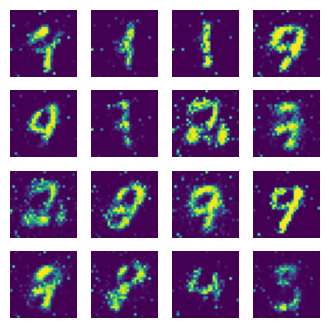

epoch: 27 	 D_epoch_loss: 0.24590493738651276 	 G_epoch_loss: 4.616251468658447


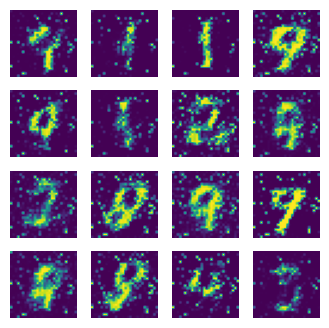

epoch: 28 	 D_epoch_loss: 0.22678841650485992 	 G_epoch_loss: 4.860037326812744


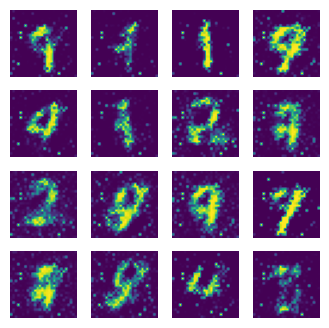

epoch: 29 	 D_epoch_loss: 0.3191525340080261 	 G_epoch_loss: 3.8816022872924805


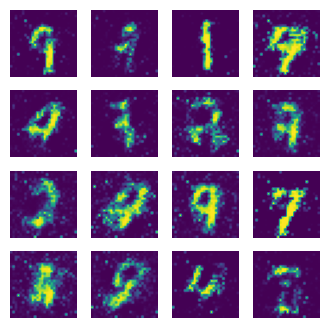

In [19]:
# 训练循环
for epoch in range(20):
    d_epoch_loss = 0
    g_epoch_loss = 0
    count = len(dataloader)
    for step, (img, _) in enumerate(dataloader):
        img = img.to(device)
        size = img.size(0)
        random_noise = torch.randn(size, 100, device=device)

        d_optim.zero_grad()

        real_output = dis(img)  # 判别器输入真实的图片，real_output 对真实图片的预测结果
        d_real_loss = loss_fn(real_output, torch.ones_like(real_output))  # 得到判别器在真实图像上的损失
        d_real_loss.backward()

        gen_img = gen(random_noise)
        fake_output = dis(gen_img.detach())  # 判别器输入生成的图片，fake_output 对生成图片的预测结果
        d_fake_loss = loss_fn(fake_output, torch.zeros_like(fake_output))  # 得到判别器在生成图像上的损失
        d_fake_loss.backward()

        d_loss = d_real_loss + d_fake_loss
        d_optim.step()

        g_optim.zero_grad()
        fake_output = dis(gen_img)
        g_loss = loss_fn(fake_output, torch.ones_like(fake_output))  # 得到生成器的损失
        g_loss.backward()
        g_optim.step()

        with torch.no_grad():
            d_epoch_loss += d_loss
            g_epoch_loss += g_loss

    with torch.no_grad():
        d_epoch_loss /= count
        g_epoch_loss /= count
        D_loss.append(d_epoch_loss)
        G_loss.append(g_epoch_loss)
        print('epoch:', epoch)
        gen_img_plot(gen, test_input)